In [2]:
import pandas as pd
pd.set_option("display.max_columns", None)

# [Quickstart](https://pycaret.gitbook.io/docs/get-started/quickstart)

## [Clustering](https://pycaret.gitbook.io/docs/get-started/quickstart#clustering)

PyCaret’s **Clustering Module** is an unsupervised machine learning module that performs the task of **grouping** a set of objects in such a way that objects in the same group (also known as a **cluster**) are more similar to each other than to those in other groups. It provides several [pre-processing](https://pycaret.gitbook.io/docs/get-started/preprocessing) features that prepare the data for modeling through the [setup](https://pycaret.gitbook.io/docs/get-started/functions#setting-up-environment) function. It has over 10 ready-to-use algorithms and [several plots](https://pycaret.gitbook.io/docs/get-started/functions#plot-model) to analyze the performance of trained models.

PyCaret の **Clustering Module** は教師なし機械学習モジュールで、同じグループ (**クラスタ**とも呼ばれる) のオブジェクトは他のグループのオブジェクトよりも互いに似ているように、オブジェクトのセットを**グループ化**するタスクを実行します。[セットアップ](https://pycaret.gitbook.io/docs/get-started/functions#setting-up-environment)機能を通じて、モデリングに必要なデータを準備するための[前処理](https://pycaret.gitbook.io/docs/get-started/preprocessing)機能をいくつか備えています。10以上のすぐに使えるアルゴリズムと、学習したモデルの性能を分析するための[いくつかのプロット](https://pycaret.gitbook.io/docs/get-started/functions#plot-model)を備えています。

### Setup

This function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function. It takes one mandatory parameter: data. All the other parameters are optional.

### セットアップ

この関数は、学習環境を初期化し、変換パイプラインを作成します。Setup 関数は他の関数を実行する前に呼び出す必要があります。この関数は，data という 1 つの必須パラメータを受け取ります．その他のパラメータは任意です．

In [3]:
from pycaret.datasets import get_data
data = get_data('jewellery')

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


When the `setup` is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To handle this, PyCaret displays a prompt, asking for data types confirmation, once you execute the `setup`. You can press enter if all data types are correct or type `quit` to exit the setup.

Ensuring that the data types are correct is really important in PyCaret as it automatically performs multiple type-specific preprocessing tasks which are imperative for machine learning models.

Alternatively, you can also use `numeric_features` and `categorical_features` parameters in the `setup` to pre-define the data types.

`setup` を実行すると、PyCaret の推論アルゴリズムが、特定のプロパティに基づいてすべての素性のデータ型を自動的に推論します。データ型は正しく推論されるはずですが、必ずしもそうなるとは限りません。これを処理するために、PyCaret は `setup` を実行すると、データ型の確認を求めるプロンプトを表示します。すべてのデータ型が正しい場合は Enter キーを、セットアップを終了する場合は `quit` と入力してください。

PyCaret は機械学習モデルで必須となる複数の型固有の前処理を自動的に行うため、データ型が正しいかどうかを確認することは非常に重要です。

また、 `setup` の `numeric_features` と `categorical_features` パラメータを使用して、データ型を事前に定義することも可能です。

In [4]:
from pycaret.clustering import *
s = setup(data, normalize=True)

,Description,Value
0,session_id,3195
1,Original Data,"(505, 4)"
2,Missing Values,False
3,Numeric Features,4
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(505, 4)"
9,CPU Jobs,-1


### Create Model

This function trains and evaluates the performance of a given model. Metrics evaluated can be accessed using the `get_metrics` function. Custom metrics can be added or removed using the `add_metric` and `remove_metric` function. All the available models can be accessed using the `models` function.

### モデル作成

この関数は与えられたモデルをトレーニングし、その性能を評価する。評価されたメトリクスには `get_metrics` 関数を用いてアクセスすることができる。カスタムメトリクスは `add_metric` と `remove_metric` 関数で追加・削除することができる。利用可能なすべてのモデルには `models` 関数を使ってアクセスすることができる。

In [5]:
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7581,1611.2649,0.3743,0,0,0


In [6]:
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=3195, tol=0.0001, verbose=0)


### Analyze Model

This function analyzes the performance of a trained model.

### モデル解析

学習したモデルの性能を解析する機能です。

In [7]:
evaluate_model(kmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

`evaluate_model` can only be used in Notebook since it uses `ipywidget` . You can also use the `plot_model` function to generate plots individually.

`evaluate_model` は `ipywidget` を使用しているため、Notebook でのみ使用することができます。また、 `plot_model` 関数を使用すると、プロットを個別に生成することができます。

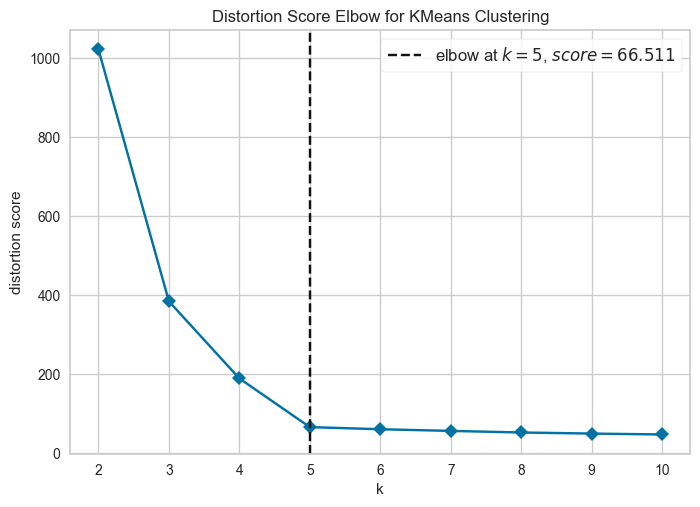

In [8]:
plot_model(kmeans, plot='elbow')

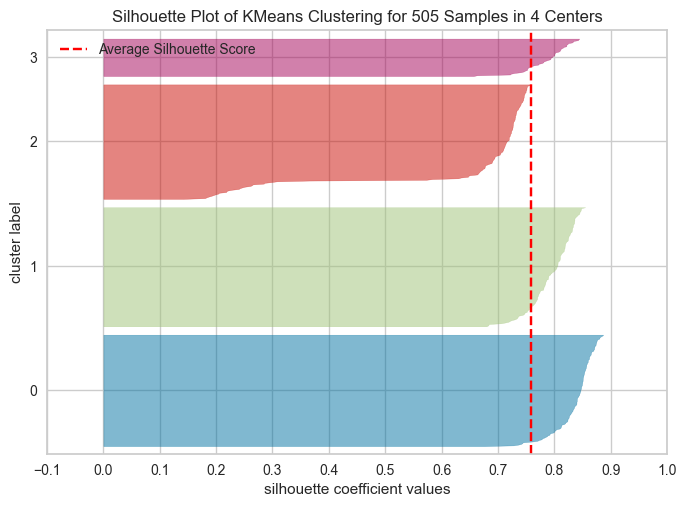

In [9]:
plot_model(kmeans, plot='silhouette')

### Assign Model

This function assigns cluster labels to the training data, given a trained model.

### モデルの割り当て

この関数は、学習済みモデルが与えられた場合に、クラスタラベルを学習データに割り当てる。

In [10]:
result = assign_model(kmeans)
result.head()

,Age,Income,SpendingScore,Savings,Cluster
0,58,77769,0.791329,6559.829923,Cluster 1
1,59,81799,0.791082,5417.661426,Cluster 1
2,62,74751,0.702657,9258.992965,Cluster 1
3,59,74373,0.765680,7346.334504,Cluster 1
4,87,17760,0.348778,16869.507130,Cluster 0


### Predictions

This function generates cluster labels using a trained model on the new/unseen dataset.

### 予測値

この関数は、新規/未見データセットに対して学習したモデルを用いて、クラスタラベルを生成する。

In [11]:
predictions = predict_model(kmeans, data=data)
predictions.head()

,Age,Income,SpendingScore,Savings,Cluster
0,58,77769,0.791329,6559.829923,Cluster 1
1,59,81799,0.791082,5417.661426,Cluster 1
2,62,74751,0.702657,9258.992965,Cluster 1
3,59,74373,0.765680,7346.334504,Cluster 1
4,87,17760,0.348778,16869.507130,Cluster 0


### Save the model

### モデルの保存

In [12]:
save_model(kmeans, 'kmeans_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='UNSUPERVISED_DUMMY_TARGET',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='most frequent',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None...
                 ('fix_perfect', 'passthrough'),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  KMe

#### To load the model back in the environment:

#### モデルを環境に戻すには:

In [13]:
loaded_model = load_model('kmeans_pipeline')
print(loaded_model)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='UNSUPERVISED_DUMMY_TARGET',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical=None,
                                fill_value_numerical=None...
                ('fix_perfect', 'passthrough'),
                ('clean_names', Clean_Colum_Names()),
                ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                ('dfs', 'passthrough'), ('pca', 'passthrough'),
                ['